In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import  PartialDependenceDisplay,permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import tree
import seaborn as sns
import numpy as np
%matplotlib inline

# Load the dataset
data = pd.read_csv('day.csv')

# Select relevant features and target
features = ['hum','temp', 'windspeed']
target = 'cnt'
X = data.loc[:,'season':'windspeed']
y = data['cnt']>=data['cnt'].median()  # Target is count of bike rentals

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [2]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train_scaled[features], y_train)

for coef, feature in zip(dt_clf.feature_importances_, dt_clf.feature_names_in_):
    print(f'{feature}_s: {coef:.3f}')

hum_s: 0.174
temp_s: 0.719
windspeed_s: 0.107


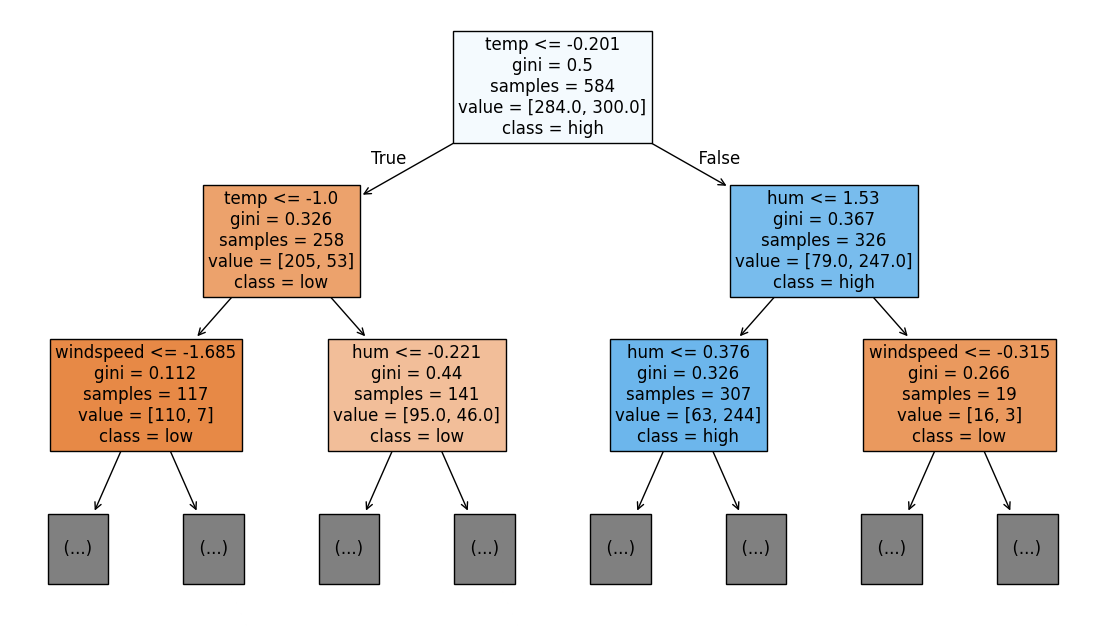

In [3]:
plt.figure(figsize=(14, 8))
plot_tree(dt_clf, feature_names=features, class_names=['low', 'high'], 
          filled=True, max_depth=2, fontsize=12)
plt.show()

In [4]:
def calculate_gini_impurity(class_probabilities):
    """
    Calculate Gini impurity for binary classification
    
    Parameters:
    class_probabilities (list): List of class probabilities that sum to 1
                               e.g., [0.3, 0.7] for a binary problem
    
    Returns:
    float: Gini impurity score
    """
    squared_probs = sum(p * p for p in class_probabilities)
    gini = 1 - squared_probs
    return gini

test_cases = [
    [1.0, 0.0],  # Pure node
    [0.5, 0.5],  # Maximum impurity
    [0.7, 0.3]   # Something in between
]

for probs in test_cases:
    print(f"Probabilities {probs}: Gini = {calculate_gini_impurity(probs):.3f}")

Probabilities [1.0, 0.0]: Gini = 0.000
Probabilities [0.5, 0.5]: Gini = 0.500
Probabilities [0.7, 0.3]: Gini = 0.420


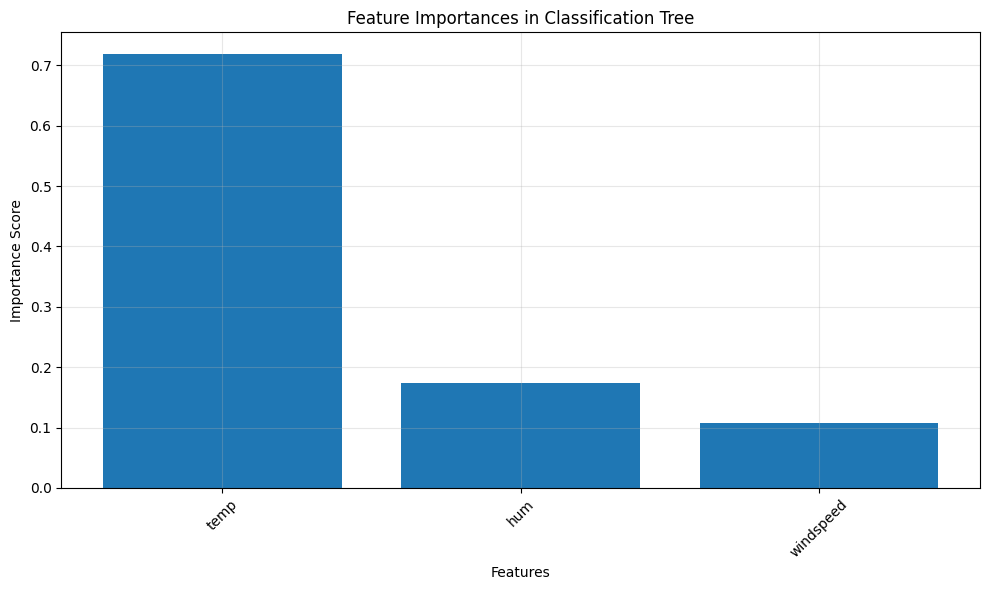

In [5]:
def visualize_feature_importance(model, feature_names):
    """
    Create a bar plot of feature importances from a trained decision tree
    
    Parameters:
    model: Trained DecisionTreeClassifier
    feature_names (list): Names of features in the same order as training data
    
    Returns:
    None (displays plot)
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
  
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances in Classification Tree')
    
  
    plt.bar(range(len(importances)), importances[indices])
    

    plt.xticks(range(len(importances)), 
               [feature_names[i] for i in indices],
               rotation=45)
    

    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


visualize_feature_importance(dt_clf, features)

In [6]:
rf_clf = RandomForestClassifier(max_depth=4, random_state=2, n_estimators=10)
rf_clf.fit(X_train_scaled[features], y_train)

rf_fi =  dict(zip(rf_clf.feature_names_in_, rf_clf.feature_importances_))
dt_fi =  dict(zip(dt_clf.feature_names_in_, dt_clf.feature_importances_))

for feature in features:
    print(f'Feature: {feature}')
    print(f'Decision Tree importance: {dt_fi[feature]:.2f} Random Forest importance: {rf_fi[feature]:.2f}')

Feature: hum
Decision Tree importance: 0.17 Random Forest importance: 0.19
Feature: temp
Decision Tree importance: 0.72 Random Forest importance: 0.62
Feature: windspeed
Decision Tree importance: 0.11 Random Forest importance: 0.19
